In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df1 = pd.read_csv("film.csv", sep=';',encoding='latin-1')
df2 = pd.read_csv("wiki_movie_plots_deduped.csv")

In [3]:
df3 = pd.read_csv("rotten_tomatoes_top_movies.csv")

In [4]:
df3 = df3.iloc[:,1:]

In [5]:
df1 = df1.iloc[1:,:-1]

In [6]:
df = df3.merge(df2[['Title','Origin/Ethnicity','Genre','Wiki Page']], how = 'inner', left_on = "title", right_on = "Title")

In [7]:
df = df[['title','year','critic_score','people_score','type','genre','rating','original_language','box_office_(gross_usa)','runtime','director','producer','writer','crew','original_language','Origin/Ethnicity']]

In [16]:
df = df.drop_duplicates()

In [18]:
df['producer'] = df['producer'].str.split(",")
df['writer'] = df['writer'].str.split(",")
df['crew'] = df['crew'].str.split(",")

/var/folders/62/t5nbbj213758m93dpkrfvlj40000gn/T/ipykernel_21623/1206790147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['producer'] = df['producer'].str.split(",")
/var/folders/62/t5nbbj213758m93dpkrfvlj40000gn/T/ipykernel_21623/1206790147.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['writer'] = df['writer'].str.split(",")
/var/folders/62/t5nbbj213758m93dpkrfvlj40000gn/T/ipykernel_21623/1206790147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [27]:
df = df.reset_index(drop=True)
df.to_csv("data.csv")

title  year  critic_score  people_score  \
0     Mad Max: Fury Road  2015            97          86.0   
1     Mad Max: Fury Road  2015            97          86.0   
2           Wonder Woman  2017            93          83.0   
3           Wonder Woman  2017            93          83.0   
4           Wonder Woman  2017            93          83.0   
...                  ...   ...           ...           ...   
1005      Wild Wild West  1999            17          28.0   
1006              Priest  2011            15          46.0   
1007              Priest  2011            15          46.0   
1008    American Outlaws  2001            14          68.0   
1009           Jonah Hex  2010            12          20.0   

                           type  \
0            Action & Adventure   
1     Science Fiction & Fantasy   
2            Action & Adventure   
3                         Drama   
4     Science Fiction & Fantasy   
...                         ...   
1005                    Western   
1006                    Western   
1007                    Western   
1008                    Western   
1009                    Western   

                                                  genre  \
0                                     adventure, action   
1                                     adventure, action   
2                            adventure, fantasy, action   
3                            adventure, fantasy, action   
4                            adventure, fantasy, action   
...                                                 ...   
1005                            comedy, western, action   
1006                            horror, action, fantasy   
1007                            horror, action, fantasy   
1008                                    western, action   
1009  mystery and thriller, fantasy, action, western...   

                                                 rating original_language  \
0     R (Intense Sequences of Violence|Disturbing Im...           English   
1     R (Intense Sequences of Violence|Disturbing Im...           English   
2     PG-13 (Sequences of Violence|Action|Some Sugge...           English   
3     PG-13 (Sequences of Violence|Action|Some Sugge...           English   
4     PG-13 (Sequences of Violence|Action|Some Sugge...           English   
...                                                 ...               ...   
1005    PG-13 (Innuendo|Action/Violence|Sex References)           English   
1006  PG-13 (Disturbing Images|Brief Strong Language...           English   
1007  PG-13 (Disturbing Images|Brief Strong Language...           English   
1008                           PG-13 (Western Violence)           English   
1009  PG-13 (Intense Sequences of Action|Disturbing ...           English   

     box_office_(gross_usa) runtime          director  \
0                   $153.6M      2h     George Miller   
1                   $153.6M      2h     George Miller   
2                   $412.8M  2h 21m     Patty Jenkins   
3                   $412.8M  2h 21m     Patty Jenkins   
4                   $412.8M  2h 21m     Patty Jenkins   
...                     ...     ...               ...   
1005                $113.8M  1h 46m  Barry Sonnenfeld   
1006                 $29.1M  1h 27m     Scott Stewart   
1007                 $29.1M  1h 27m     Scott Stewart   
1008                 $13.3M  1h 33m      Les Mayfield   
1009                 $10.5M  1h 21m     Jimmy Hayward   

                                               producer  \
0         [Doug Mitchell,  George Miller,  P.J. Voeten]   
1         [Doug Mitchell,  George Miller,  P.J. Voeten]   
2     [Charles Roven,  Deborah Snyder,  Zack Snyder,...   
3     [Charles Roven,  Deborah Snyder,  Zack Snyder,...   
4     [Charles Roven,  Deborah Snyder,  Zack Snyder,...   
...                                                 ...   
1005                                                NaN   
1006   [Michael De Luca,  Joshua Donen,  Mitchell Peck]   
100

In [29]:
new = df.drop_duplicates(subset=["title"])

In [38]:
new = new.reset_index(drop=True)
color = []
for i in range(new.shape[0]):
    c = new["critic_score"].loc[i]
    p = new["people_score"].loc[i]
    if c >= 60 and p >= 60:
        color += ['red']
    elif c<60 and p<60:
        color += ['green']
    else:
        color += ["orange"]

In [40]:
new["color"] = color
new.head()

title  year  critic_score  people_score                type  \
0  Mad Max: Fury Road  2015            97          86.0  Action & Adventure   
1        Wonder Woman  2017            93          83.0  Action & Adventure   
2             Dunkirk  2017            92          81.0  Action & Adventure   
3                Coco  2017            97          94.0  Action & Adventure   
4      Thor: Ragnarok  2017            93          87.0  Action & Adventure   

                                               genre  \
0                                  adventure, action   
1                         adventure, fantasy, action   
2                                drama, history, war   
3  comedy, music, animation, kids and family, adv...   
4         comedy, fantasy, sci fi, action, adventure   

                                              rating original_language  \
0  R (Intense Sequences of Violence|Disturbing Im...           English   
1  PG-13 (Sequences of Violence|Action|Some Sugge...           English   
2       PG-13 (Some Language|Intense War Experience)           English   
3                             PG (Thematic Elements)           English   
4  PG-13 (Brief Suggestive Material|Action|Intens...           English   

  box_office_(gross_usa) runtime           director  \
0                $153.6M      2h      George Miller   
1                $412.8M  2h 21m      Patty Jenkins   
2                $188.0M  1h 47m  Christopher Nolan   
3                $210.5M  1h 49m        Lee Unkrich   
4                $315.0M  2h 10m      Taika Waititi   

                                            producer  \
0      [Doug Mitchell,  George Miller,  P.J. Voeten]   
1  [Charles Roven,  Deborah Snyder,  Zack Snyder,...   
2                  [Emma Thomas,  Christopher Nolan]   
3                                [Darla K. Anderson]   
4                                      [Kevin Feige]   

                                              writer  \
0  [George Miller,  Brendan McCarthy,  Nick Latho...   
1                                   [Allan Heinberg]   
2                                [Christopher Nolan]   
3                  [Adrian Molina,  Matthew Aldrich]   
4  [Eric Pearson,  Craig Kyle,  Christopher L. Yost]   

                                                crew original_language  \
0  [Tom Hardy,  Charlize Theron,  Nicholas Hoult,...           English   
1  [Gal Gadot,  Chris Pine,  Connie Nielsen,  Rob...           English   
2  [Fionn Whitehead,  Tom Glynn-Carney,  Jack Low...           English   
3  [Anthony Gonzalez,  Benjamin Bratt,  Alanna Ub...           English   
4  [Chris Hemsworth,  Tom Hiddleston,  Cate Blanc...           English   

  Origin/Ethnicity color  
0         American   red  
1         American   red  
2          British   red  
3         American   red  
4         American   red

In [43]:
new['Origin/Ethnicity'].value_counts()

American        425
British          52
Japanese         17
Canadian          6
Australian        5
South_Korean      3
Bollywood         3
Hong Kong         2
Russian           2
Chinese           1
Tamil             1
Name: Origin/Ethnicity, dtype: int64

In [44]:
new

title  year  critic_score  people_score                type  \
0    Mad Max: Fury Road  2015            97          86.0  Action & Adventure   
1          Wonder Woman  2017            93          83.0  Action & Adventure   
2               Dunkirk  2017            92          81.0  Action & Adventure   
3                  Coco  2017            97          94.0  Action & Adventure   
4        Thor: Ragnarok  2017            93          87.0  Action & Adventure   
..                  ...   ...           ...           ...                 ...   
512      The Dark Tower  2017            16          45.0             Western   
513      Wild Wild West  1999            17          28.0             Western   
514              Priest  2011            15          46.0             Western   
515    American Outlaws  2001            14          68.0             Western   
516           Jonah Hex  2010            12          20.0             Western   

                                                 genre  \
0                                    adventure, action   
1                           adventure, fantasy, action   
2                                  drama, history, war   
3    comedy, music, animation, kids and family, adv...   
4           comedy, fantasy, sci fi, action, adventure   
..                                                 ...   
512                         adventure, action, fantasy   
513                            comedy, western, action   
514                            horror, action, fantasy   
515                                    western, action   
516  mystery and thriller, fantasy, action, western...   

                                                rating original_language  \
0    R (Intense Sequences of Violence|Disturbing Im...           English   
1    PG-13 (Sequences of Violence|Action|Some Sugge...           English   
2         PG-13 (Some Language|Intense War Experience)           English   
3                               PG (Thematic Elements)           English   
4    PG-13 (Brief Suggestive Material|Action|Intens...           English   
..                                                 ...               ...   
512  PG-13 (Sequences of Gun Violence|Action|Themat...           English   
513    PG-13 (Innuendo|Action/Violence|Sex References)           English   
514  PG-13 (Disturbing Images|Brief Strong Language...           English   
515                           PG-13 (Western Violence)           English   
516  PG-13 (Intense Sequences of Action|Disturbing ...           English   

    box_office_(gross_usa) runtime           director  \
0                  $153.6M      2h      George Miller   
1                  $412.8M  2h 21m      Patty Jenkins   
2                  $188.0M  1h 47m  Christopher Nolan   
3                  $210.5M  1h 49m        Lee Unkrich   
4                  $315.0M  2h 10m      Taika Waititi   
..                     ...     ...                ...   
512                 $50.7M  1h 35m      Nikolaj Arcel   
513                $113.8M  1h 46m   Barry Sonnenfeld   
514                 $29.1M  1h 27m      Scott Stewart   
515                 $13.3M  1h 33m       Les Mayfield   
516                 $10.5M  1h 21m      Jimmy Hayward   

                                              producer  \
0        [Doug Mitchell,  George Miller,  P.J. Voeten]   
1    [Charles Roven,  Deborah Snyder,  Zack Snyder,...   
2                    [Emma Thomas,  Christopher Nolan]   
3                                  [Darla K. Anderson]   
4                                        [Kevin Feige]   
..                                                 ...   
512  [Akiva Goldsman,  Brian Grazer,  Ron Howard,  ...   
513                                                NaN   
514   [Michael De Luca,  Joshua Donen,  Mitchell Peck]   
515                  [James G. Robinson,  Bill Gerber]   
516                    [Akiva Goldsman,  Andrew Lazar]   

                                                write

In [41]:
new.to_csv("new.csv")

In [132]:
b = df[['type', 'people_score']].groupby("type").mean()['people_score'].sort_values()

Text(0, 0.5, 'Type')

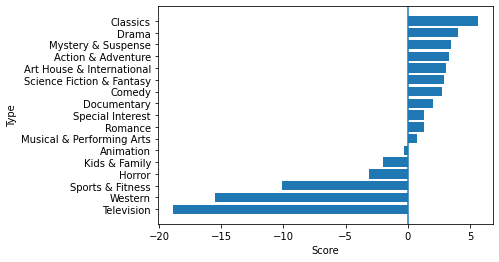

In [137]:
plt.barh(b.index, b-m)
plt.axvline(0)
plt.xlabel("Score")
plt.ylabel("Type")

Text(0, 0.5, 'Origin/Ethnicity')

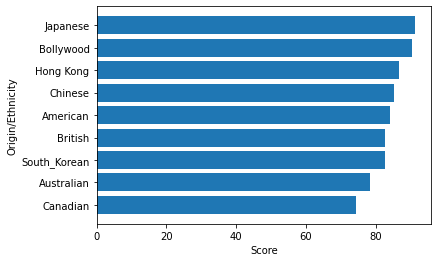

In [120]:
a = df[['Origin/Ethnicity', 'people_score']].groupby('Origin/Ethnicity').mean()['people_score'].sort_values()[ind]
a = a.sort_values()
plt.barh(ind, a[ind])
plt.xlabel("People Score")
plt.ylabel('Origin/Ethnicity')

In [111]:
ind = ['American','British','Japanese','Hong Kong','Bollywood','Canadian','Chinese','Australian','South_Korean']

In [113]:
a[ind]

Origin/Ethnicity
American        84.034598
British         82.637037
Japanese        91.408163
Hong Kong       86.642857
Bollywood       90.461538
Canadian        74.333333
Chinese         85.375000
Australian      78.375000
South_Korean    82.600000
Name: people_score, dtype: float64

Text(0, 0.5, 'People Score')

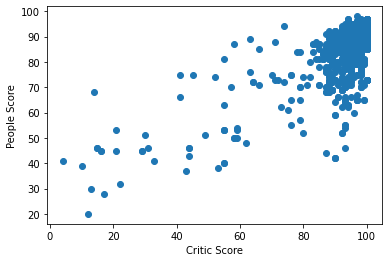

In [119]:
plt.scatter(df['critic_score'],df['people_score'])
plt.xlabel("Critic Score")
plt.ylabel("People Score")

In [121]:
diff = abs(df['critic_score']- df['people_score'])

In [122]:
diff[diff >=40]

19      48.0
20      48.0
21      48.0
374     40.0
375     40.0
875     43.0
921     47.0
1144    54.0
dtype: float64

In [129]:
df.loc[875]

title                                                     It Comes at Night
year                                                                   2017
critic_score                                                             87
people_score                                                           44.0
type                                                                 Horror
genre                                          mystery and thriller, horror
rating                              R (Language|Disturbing Images|Violence)
original_language                                                   English
box_office_(gross_usa)                                               $14.0M
runtime                                                              1h 37m
director                                                 Trey Edward Shults
producer                                           David Kaplan, Andrea Roa
writer                                                   Trey Edward Shults
crew        

In [89]:
df[]

title  year  critic_score  people_score  \
0     Mad Max: Fury Road  2015            97          86.0   
1     Mad Max: Fury Road  2015            97          86.0   
2           Wonder Woman  2017            93          83.0   
3           Wonder Woman  2017            93          83.0   
4           Wonder Woman  2017            93          83.0   
...                  ...   ...           ...           ...   
1141      Wild Wild West  1999            17          28.0   
1142              Priest  2011            15          46.0   
1143              Priest  2011            15          46.0   
1144    American Outlaws  2001            14          68.0   
1145           Jonah Hex  2010            12          20.0   

                           type  \
0            Action & Adventure   
1     Science Fiction & Fantasy   
2            Action & Adventure   
3                         Drama   
4     Science Fiction & Fantasy   
...                         ...   
1141                    Western   
1142                    Western   
1143                    Western   
1144                    Western   
1145                    Western   

                                                  genre  \
0                                     adventure, action   
1                                     adventure, action   
2                            adventure, fantasy, action   
3                            adventure, fantasy, action   
4                            adventure, fantasy, action   
...                                                 ...   
1141                            comedy, western, action   
1142                            horror, action, fantasy   
1143                            horror, action, fantasy   
1144                                    western, action   
1145  mystery and thriller, fantasy, action, western...   

                                                 rating original_language  \
0     R (Intense Sequences of Violence|Disturbing Im...           English   
1     R (Intense Sequences of Violence|Disturbing Im...           English   
2     PG-13 (Sequences of Violence|Action|Some Sugge...           English   
3     PG-13 (Sequences of Violence|Action|Some Sugge...           English   
4     PG-13 (Sequences of Violence|Action|Some Sugge...           English   
...                                                 ...               ...   
1141    PG-13 (Innuendo|Action/Violence|Sex References)           English   
1142  PG-13 (Disturbing Images|Brief Strong Language...           English   
1143  PG-13 (Disturbing Images|Brief Strong Language...           English   
1144                           PG-13 (Western Violence)           English   
1145  PG-13 (Intense Sequences of Action|Disturbing ...           English   

     box_office_(gross_usa) runtime          director  \
0                   $153.6M      2h     George Miller   
1                   $153.6M      2h     George Miller   
2                   $412.8M  2h 21m     Patty Jenkins   
3                   $412.8M  2h 21m     Patty Jenkins   
4                   $412.8M  2h 21m     Patty Jenkins   
...                     ...     ...               ...   
1141                $113.8M  1h 46m  Barry Sonnenfeld   
1142                 $29.1M  1h 27m     Scott Stewart   
1143                 $29.1M  1h 27m     Scott Stewart   
1144                 $13.3M  1h 33m      Les Mayfield   
1145                 $10.5M  1h 21m     Jimmy Hayward   

                                               producer  \
0             Doug Mitchell, George Miller, P.J. Voeten   
1             Doug Mitchell, George Miller, P.J. Voeten   
2     Charles Roven, Deborah Snyder, Zack Snyder, Ri...   
3     Charles Roven, Deborah Snyder, Zack Snyder, Ri...   
4     Charles Roven, Deborah Snyder, Zack Snyder, Ri...   
...                                                 ...   
1141                                                NaN   
1142       Michael De Luca, Joshua Donen, Mitchell Peck   
114

In [22]:
df

Year Length                    Title  Subject          Actor  \
0    1979    122                     Cuba   Action  Connery, Sean   
1    1978     94           Days of Heaven    Drama  Gere, Richard   
2    1983    140                Octopussy   Action   Moore, Roger   
3    1929     84                Blackmail  Mystery  Longden, John   
4    1929     84                Blackmail  Mystery  Longden, John   
..    ...    ...                      ...      ...            ...   
877  1991     54  Neath the Arizona Skies  Western    Wayne, John   
878  1991     53        Randy Rides Alone  Western    Wayne, John   
879  1992    134                Red River  Western    Wayne, John   
880  1992    134                Red River  Western    Wayne, John   
881  1990    NaN          Sagebrush Trail  Western    Wayne, John   

           Actress           Director Popularity Awards Origin/Ethnicity  \
0    Adams, Brooke    Lester, Richard          6     No         American   
1    Adams, Brooke   Malick, Terrence         14     No         American   
2      Adams, Maud         Glen, John         68     No          British   
3     Algood, Sara  Hitchcock, Alfred          2     No         American   
4     Algood, Sara  Hitchcock, Alfred          2     No         American   
..             ...                ...        ...    ...              ...   
877            NaN                NaN         28     No         American   
878            NaN                NaN         75     No         American   
879            NaN                NaN         16     No         American   
880            NaN                NaN         16     No          Chinese   
881            NaN                NaN         23     No         American   

           Genre                                          Wiki Page  
0          drama          https://en.wikipedia.org/wiki/Cuba_(film)  
1          drama       https://en.wikipedia.org/wiki/Days_of_Heaven  
2     spy/action            https://en.wikipedia.org/wiki/Octopussy  
3    crime drama  https://en.wikipedia.org/wiki/Blackmail_(1939_...  
4          crime  https://en.wikipedia.org/wiki/Blackmail_(1947_...  
..           ...                                                ...  
877      western  https://en.wikipedia.org/wiki/%27Neath_the_Ari...  
878      western    https://en.wikipedia.org/wiki/Randy_Rides_Alone  
879      western  https://en.wikipedia.org/wiki/Red_River_(1948_...  
880        drama  https://en.wikipedia.org/wiki/Red_River_(2009_...  
881      western      https://en.wikipedia.org/wiki/Sagebrush_Trail  

[882 rows x 12 columns]

In [23]:
trade = pd.read_csv("trade.csv")
trade

ReporterISO3 ReporterName PartnerISO3 PartnerName  Year TradeFlowName  \
0               AFG  Afghanistan         SWE      Sweden  2017        Export   
1               AFG  Afghanistan         JOR      Jordan  2018        Export   
2               AFG  Afghanistan         JOR      Jordan  2017        Export   
3               AFG  Afghanistan         ITA       Italy  2018        Export   
4               AFG  Afghanistan         ITA       Italy  2017        Export   
...             ...          ...         ...         ...   ...           ...   
634504          ZWE     Zimbabwe         BRA      Brazil  2000        Export   
634505          ZWE     Zimbabwe         BOL     Bolivia  2000        Export   
634506          ZWE     Zimbabwe         BMU     Bermuda  2002        Export   
634507          ZWE     Zimbabwe         BLZ      Belize  2000        Export   
634508          ZWE     Zimbabwe         ZMB      Zambia  2011        Export   

        TradeValue in 1000 USD  
0                       86.752  
1                     2796.481  
2                     3100.187  
3                      279.918  
4                      416.642  
...                        ...  
634504                1267.731  
634505                   2.635  
634506                  10.599  
634507                  17.772  
634508               75360.923  

[634509 rows x 7 columns]

In [29]:
result = trade[['ReporterName','TradeValue in 1000 USD']].groupby(by = "ReporterName").sum()

In [41]:
a = result['TradeValue in 1000 USD'].sort_values()[-5:]

<BarContainer object of 5 artists>

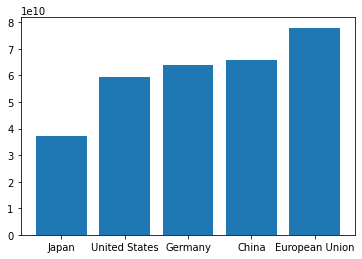

In [42]:
plt.bar(a.index, a)